In [1]:
from polygon_client import polygon_request
import pymc as pm

In [2]:
df = polygon_request('SPY', 1, 'day', '2010-01-01', '2020-12-31')

In [3]:
df

,open,high,low,close,volume,vwap
timestamp,,,,,,
2010-01-04 00:00:00-05:00,112.37,113.39,112.330,113.33,119331697.0,112.9052
2010-01-05 00:00:00-05:00,113.26,113.68,112.850,113.63,111708379.0,113.3635
2010-01-06 00:00:00-05:00,113.52,113.99,113.430,113.71,116235245.0,113.6964
2010-01-07 00:00:00-05:00,113.50,114.33,113.180,114.19,131217008.0,113.8358
2010-01-08 00:00:00-05:00,113.89,114.62,113.660,114.57,126555901.0,114.1353
...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,368.08,369.03,367.450,369.00,26440653.0,368.3937
2020-12-28 00:00:00-05:00,371.74,372.59,371.070,372.17,39196359.0,371.7342
2020-12-29 00:00:00-05:00,373.81,374.00,370.830,371.46,53922979.0,371.9064


In [7]:
returns = df.close.pct_change()

In [8]:
returns = returns.dropna()

In [10]:
returns.values

array([ 0.00264714,  0.00070404,  0.00422126, ..., -0.00190773,
        0.0014268 ,  0.00508078])

In [ ]:
model = pm.Model

In [19]:
with model:
    beta = pm.Normal('beta', 0, 1)
    mu = returns.values*beta
    stdev = pm.HalfNormal('stdev', 10)
    obs = pm.Normal('obs',mu=mu, sigma=stdev, observed=returns.values)

In [20]:
with model:
    idata =pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, stdev]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 45 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 9787 divergences after tuning. Increase `target_accept` or reparameterize.


In [21]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [22]:
import arviz as az

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'stdev'}>,
        <Axes: title={'center': 'stdev'}>]], dtype=object)

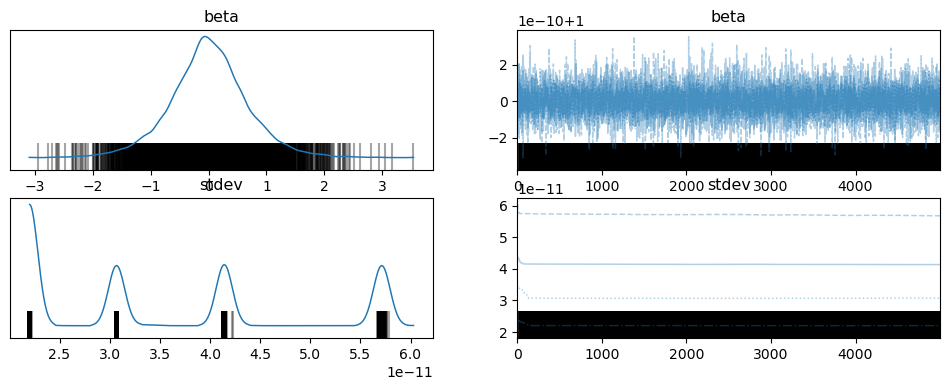

In [23]:
az.plot_trace(idata, combined=True)

In [24]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,1.0,0.0,1.0,1.0,0.0,0.0,10729.66,104.37,1.08
stdev,0.0,0.0,0.0,0.0,0.0,0.0,4.40,11.17,3.67
